In [1]:
import tensorflow
print(tensorflow.__version__)

2.15.0


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!ls /content/drive/'My Drive'/COSC2673A2/

A2-TrafficSigns.ipynb  trafficsigns_dataset.zip


In [4]:
!cp /content/drive/'My Drive'/COSC2673A2/trafficsigns_dataset.zip .
!unzip -q -o trafficsigns_dataset.zip
!rm trafficsigns_dataset.zip
!ls


drive  __MACOSX  sample_data  trafficsigns_dataset


**EDA**

In [5]:
# libraries

import os
from PIL import Image

import matplotlib.pyplot as plt
import random
from PIL import Image

import matplotlib.pyplot as plt
import pandas as pd
import glob

In [6]:
dataset_folder = 'trafficsigns_dataset'

# List subfolders in dataset folder
subfolders = [subfolder for subfolder in os.listdir(dataset_folder) if os.path.isdir(os.path.join(dataset_folder, subfolder))]

# Iterate over subfolders
for subfolder in subfolders:
    subfolder_path = os.path.join(dataset_folder, subfolder)
    print(f"Subfolder: {subfolder}")

    # List files in current subfolder
    files = os.listdir(subfolder_path)

    # Print files in current subfolder
    for file in files:
        print(f"  - {file}")


Subfolder: hex
  - stop
Subfolder: triangle
  - warning
  - giveway
Subfolder: diamond
  - rightofway
Subfolder: square
  - continue
  - laneend
  - crossing
  - parking
  - .DS_Store
Subfolder: round
  - limitedtraffic
  - speed
  - trafficdirective
  - bicycle
  - traveldirection
  - noparking
  - roundabout
  - .DS_Store
  - noentry


In [14]:
dataset_folder = 'trafficsigns_dataset'
subfolders = ['hex', 'triangle', 'diamond', 'square', 'round']

data = []
subfolder_variables = {}

# Iterate over the main subfolders
for label in subfolders:
    subfolder_path = os.path.join(dataset_folder, label)

    # Check if the subfolder exists
    if os.path.exists(subfolder_path) and os.path.isdir(subfolder_path):
        subfolder_contents = os.listdir(subfolder_path)
        subfolder_variables[label] = {}  # Initialize empty dictionary for sub-subfolders

        # Iterate over the sub-subfolders
        for sub_label in subfolder_contents:
            sub_subfolder_path = os.path.join(subfolder_path, sub_label)

            # Check if the sub-subfolder exists
            if os.path.exists(sub_subfolder_path) and os.path.isdir(sub_subfolder_path):
                images = []

                # Iterate over the image files in the sub-subfolder
                for filename in os.listdir(sub_subfolder_path):
                    file_path = os.path.join(sub_subfolder_path, filename)

                    # Check if the file is an image (PNG format)
                    if filename.endswith('.png'):
                        # Open the image using PIL
                        image = Image.open(file_path)

                        # Append the image to the list of images for the sub-subfolder
                        images.append(image)

                # Save the list of images for the current sub-subfolder in subfolder_variables
                subfolder_variables[label][sub_label] = images

                # Append image name and label to the data list for DataFrame creation
                for image in images:
                    data.append({'image name': os.path.basename(file_path), 'label': os.path.join(label, sub_label)})

# Create a DataFrame from the list of dictionaries (data)
df = pd.DataFrame(data)

# Display the DataFrame
df.head()


,image name,label
0,00715_00003.png,hex/stop
1,00715_00003.png,hex/stop
2,00715_00003.png,hex/stop
3,00715_00003.png,hex/stop
4,00715_00003.png,hex/stop


In [10]:
label_counts = df['label'].value_counts()
print(label_counts)

label
triangle/warning          695
round/noentry             375
round/speed               316
round/bicycle             285
diamond/rightofway        282
square/parking            276
round/noparking           242
triangle/giveway          231
square/continue           199
round/trafficdirective    195
round/limitedtraffic      125
round/traveldirection     124
square/laneend            118
round/roundabout           98
square/crossing            95
hex/stop                   43
Name: count, dtype: int64


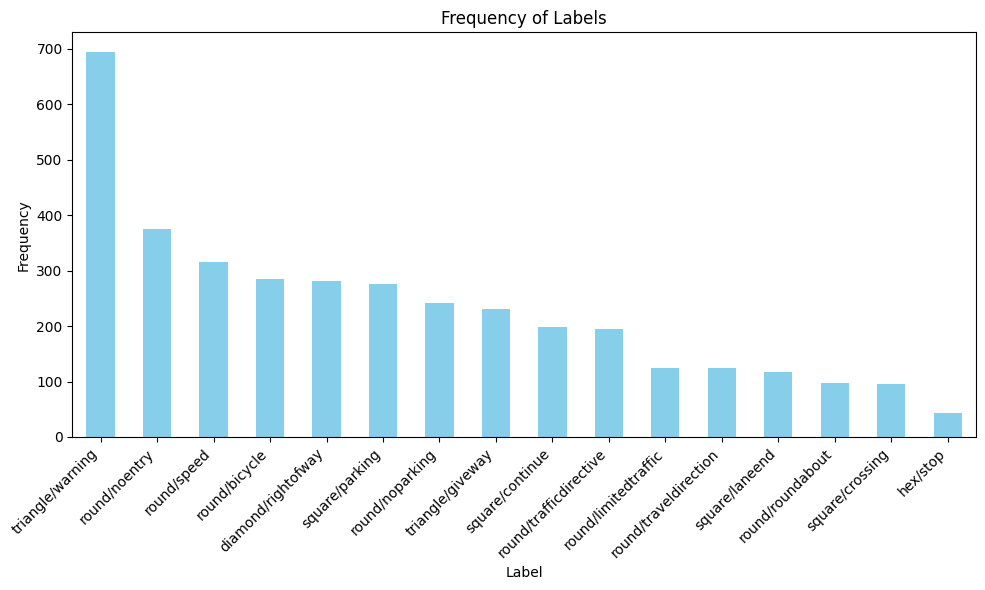

In [11]:
# Plotting length of each label with bar chart
plt.figure(figsize=(10, 6))

# Create a bar plot
label_counts.plot(kind='bar', color='skyblue')

plt.title('Frequency of Labels')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [15]:
print(subfolder_variables['hex']['stop'])

[<PIL.PngImagePlugin.PngImageFile image mode=L size=28x28 at 0x782D2869C280>, <PIL.PngImagePlugin.PngImageFile image mode=L size=28x28 at 0x782D2BABFCA0>, <PIL.PngImagePlugin.PngImageFile image mode=L size=28x28 at 0x782D2B4914E0>, <PIL.PngImagePlugin.PngImageFile image mode=L size=28x28 at 0x782D2B491540>, <PIL.PngImagePlugin.PngImageFile image mode=L size=28x28 at 0x782D2B4914B0>, <PIL.PngImagePlugin.PngImageFile image mode=L size=28x28 at 0x782D2B491450>, <PIL.PngImagePlugin.PngImageFile image mode=L size=28x28 at 0x782D2B4913F0>, <PIL.PngImagePlugin.PngImageFile image mode=L size=28x28 at 0x782D2B491390>, <PIL.PngImagePlugin.PngImageFile image mode=L size=28x28 at 0x782D2B491330>, <PIL.PngImagePlugin.PngImageFile image mode=L size=28x28 at 0x782D2B4912D0>, <PIL.PngImagePlugin.PngImageFile image mode=L size=28x28 at 0x782D2B491270>, <PIL.PngImagePlugin.PngImageFile image mode=L size=28x28 at 0x782D2B491210>, <PIL.PngImagePlugin.PngImageFile image mode=L size=28x28 at 0x782D2B4911B0>

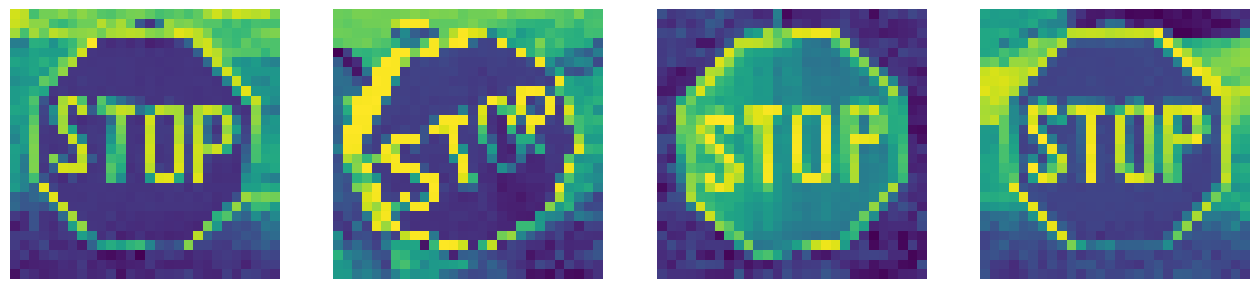

In [16]:
def random_image(pic_list, sample_size=4):
    '''Display a random sample of images from pic_list'''
    fig = plt.gcf()
    fig.set_size_inches(16, 16)  # fig size

    # Randomly select a subset of images from pic_list
    sampled_images = random.sample(pic_list, min(sample_size, len(pic_list)))

    # Display the sampled images
    for i, img in enumerate(sampled_images):
        sp = plt.subplot(1, sample_size, i + 1)
        sp.axis('Off')
        plt.imshow(img)

    plt.show()

# show stop subfolder of hex
random_image(subfolder_variables['hex']['stop'], sample_size=4)


In [ ]:
# show stop subfolder of hex
random_image(subfolder_variables['triangle']['warning'], sample_size=4)

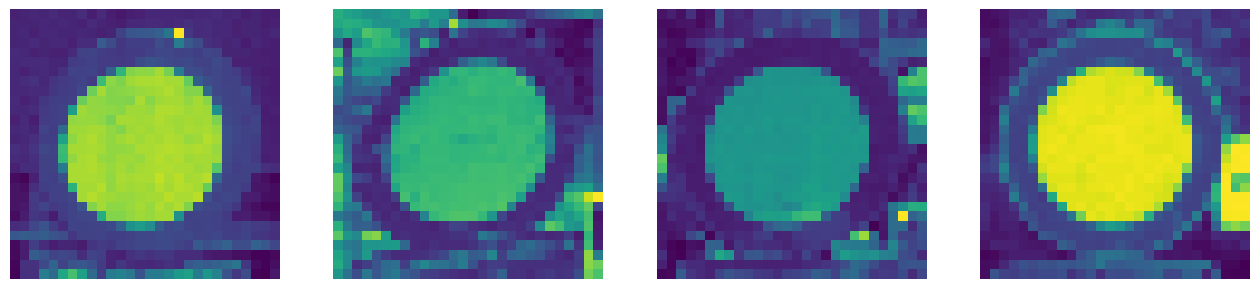

In [18]:
# show stop subfolder of hex
random_image(subfolder_variables['round']['limitedtraffic'], sample_size=4)